In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
Sample='orion'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

DataNO=dict()
DataO=dict()


for i in range(len(samples)):
    DataNO[i]=samples[0][i]
    
for i in range(len(samples)):
    DataO[i]=pd.read_csv('SFdata//'+DataNO[i]+'.csv')    



samples

,0
0,1951VHOrion1
1,1951VHOrion2
2,1958MchOrion
3,2016ArthOrionH
4,Orion1
5,Orion2


In [4]:
B=DataO[5].S[0:40]
r=DataO[5].pc[0:40]

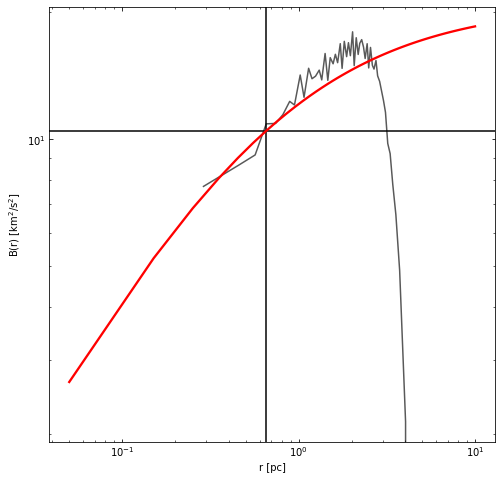

In [5]:
fig, ax=plt.subplots(figsize=(8,8))


plt.loglog(DataO[5].pc,DataO[5].S,color="black",alpha=0.65)

plt.axhline(y=3.23**2, color='black', linestyle='-')
plt.axvline(x=0.65, color='black', linestyle='-')


lo=0.65
ss=3.23**2
n=0.75
x=np.linspace(0.05,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='r', linestyle='-',linewidth='2.3')


#ax.text(0.83, 0.15,'m = 1.15', ha='center', va='center', transform=ax.transAxes, color='red')
#ax.text(0.83, 0.20,'r$_{0}$ = 1.5 pc', ha='center', va='center', transform=ax.transAxes, color='red')
#ax.text(0.84, 0.25,'σ = 2.7 km/s', ha='center', va='center', transform=ax.transAxes, color='red')
    
ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)



In [6]:
rgrid = np.logspace(0.0, 2)

s0 = (0.00242)/2.355             
m = n

sig2 = ss
r0 = lo

fig, ax = plt.subplots(figsize=(8, 8))
# Plot fit to unweighted strucfunc
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, s0, 1.5), color="red")
ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2)
ax.axvline( 2.355  * s0, linestyle="dashed")
ax.axvline(r0, linestyle="dotted")

ax.set(
    xscale = "log",
    yscale = "log",
#    ylim  = [1, 250],
#    xlim  = [1, 150],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

sig2,r0

In [7]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [8]:
relative_uncertainty = 0.1
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 1.5

In [9]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2    10.4329        0      inf    False    


In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1/10,
)

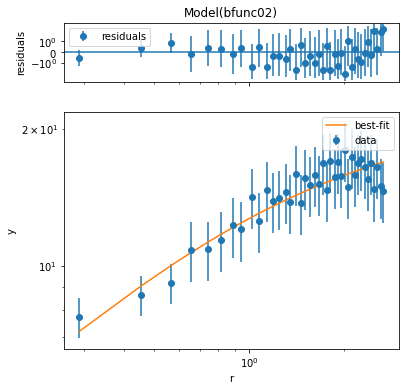

In [11]:
fig, _ = result2.plot()
fig.axes[0].set(
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale="log",
    yscale="log",
);



In [12]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 40
    # variables        = 4
    chi-square         = 8.90445009
    reduced chi-square = 0.24734584
    Akaike info crit   = -52.0931317
    Bayesian info crit = -45.3376139
##  Warning: uncertainties could not be estimated:
    s0:     at initial value
[[Variables]]
    r0:     0.84187053 (init = 0.65)
    sig2:   10.4329 (fixed)
    m:      0.90787791 (init = 0.75)
    s0:     0.00102760 (init = 0.001027601)
    noise:  1.46563614 (init = 0.1)


In [13]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [14]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(s0=0.000924840764331214) = 0.0 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(s0=0.001130360934182595) = 0.0 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(noise=0.0) = 0.6414339916936603 < max(sigmas)
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -0.30962  -0.28158  -0.24903   0.84187  +0.37976  +0.85118  +1.35803
 m    :  -0.14538  -0.09432  -0.04658   0.90788  +0.04823  +0.10941  +0.17052
 s0   :      -inf      -inf      -inf   0.00103      +inf      +inf      +inf
 noise:      -inf      -inf      -inf   1.46564  +1.61599  +3.11780  +4.44496


In [15]:
plt.style.use([
    "seaborn-poster",
])

In [19]:
plot_limits = {
    "s0": [0.0, 0.3],
    "m": [0.5, 1.2],
    "r0": [0.0, 3.0],
    "noise": [0.0, 2.0],
}

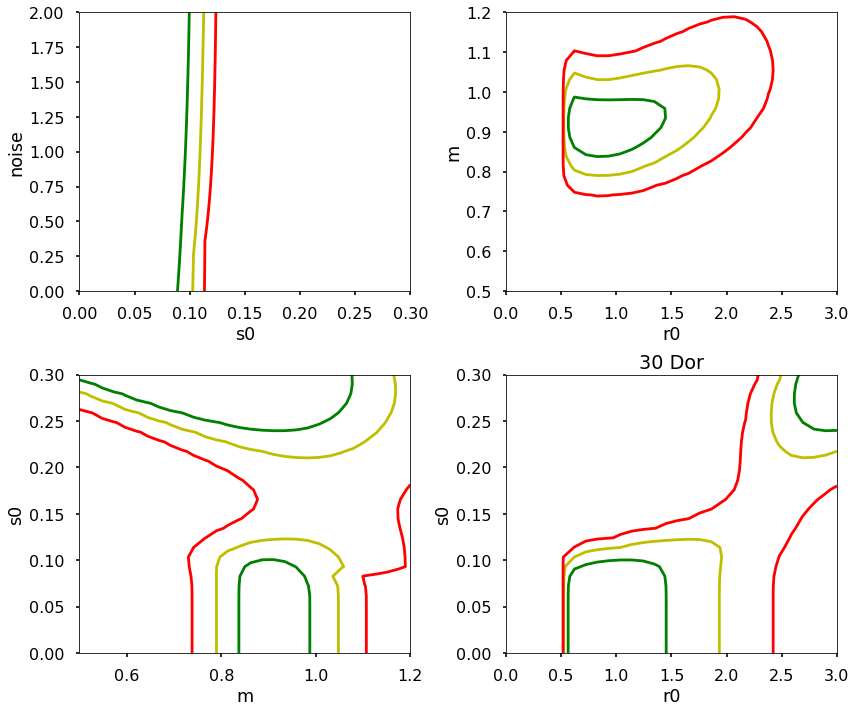

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('30 Dor')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [18]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 146.1283028125763 seconds ---
